<h1>Linear regression</h1>
<h3> Here is the code for implementation linear regression with Boston dataset for price prediction</h3>


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<h4> Download dataset </h4>

In [9]:
boston = load_boston()
X = boston.data
y = boston.target.reshape(-1, 1)

/Users/diananam/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California ho

Draw correlation matrix to be sure that all features have influence to taget

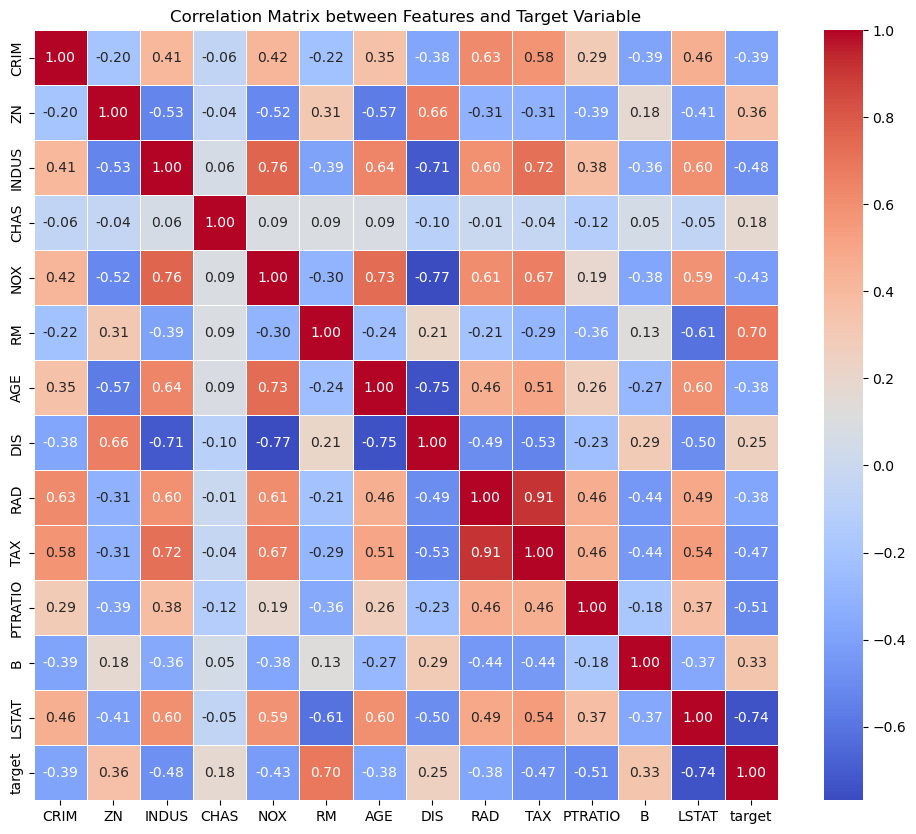

In [10]:
columns = np.append(boston.feature_names, 'target')
data = np.concatenate((X, y), axis=1)
df = pd.DataFrame(data, columns=columns)
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix between Features and Target Variable')
plt.show()

<h4> Split data and normalize</h4>

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)


In [13]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)


In [14]:
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)

In [15]:
# Instantiate the model
input_size = X_train.shape[1]
model = LinearRegressionModel(input_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [16]:
# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)

    # Compute the loss
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 33.0780
Epoch [200/1000], Loss: 22.6346
Epoch [300/1000], Loss: 22.1359
Epoch [400/1000], Loss: 21.9555
Epoch [500/1000], Loss: 21.8521
Epoch [600/1000], Loss: 21.7884
Epoch [700/1000], Loss: 21.7472
Epoch [800/1000], Loss: 21.7193
Epoch [900/1000], Loss: 21.6997
Epoch [1000/1000], Loss: 21.6856


In [17]:
# Convert test data to PyTorch tensor
X_test_tensor = torch.FloatTensor(X_test)

# Make predictions
with torch.no_grad():
    predictions = model(X_test_tensor)

# Calculate test set MSE (Mean Squared Error)
test_mse = criterion(predictions, torch.FloatTensor(np.array(y_test)))
print(f'Test MSE: {test_mse.item():.4f}')


Test MSE: 24.6790


<h4> Your task is rewrite code above for logistic regression </h4> 
Take into accont that you need to update activation fuction and loss function as well 

In [6]:
df=pd.read_csv('diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


You solve binary classification problem, draw confusion matrix to check how your model work

Also you need to calculate accuracy, precision and recall for model evaluation 

In [ ]:
!pip 